In [1]:
# This cell is added by sphinx-gallery
# It can be customized to whatever you like
%matplotlib inline

In [3]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def circuit(params):
    # |psi_0>: state preparation
    qml.RY(np.pi / 4, wires=0)
    qml.RY(np.pi / 3, wires=1)
    qml.RY(np.pi / 7, wires=2)

    # V0(theta0, theta1): Parametrized layer 0
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)

    # W1: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    # V_1(theta2, theta3): Parametrized layer 1
    qml.RY(params[2], wires=1)
    qml.RX(params[3], wires=2)

    # W2: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    return qml.expval(qml.PauliZ(0))


params = np.array([0.432, -0.123, 0.543, 0.233])

In [25]:
import qiskit
qc = qiskit.QuantumCircuit(2)
qc.rz(0.543, [0])
qc.cx(0, 1)
my_circuit = qml.from_qiskit(qc)

ValueError: Converter does not exist. Make sure the required plugin is installed and supports conversion.

In [14]:
steps = 200
init_params = np.array([0.432, -0.123, 0.543, 0.233], requires_grad=True)

In [15]:
gd_cost = []
opt = qml.GradientDescentOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    gd_cost.append(circuit(theta))



In [24]:
print(circuit.draw())
print(theta)

 0: ──RY(0.785)──RZ(-0.0215)──╭C─────────────────╭C──────┤ ⟨Y⟩ 
 1: ──RY(1.05)───RZ(-1.57)────╰X──╭C──RY(1.55)───╰X──╭C──┤     
 2: ──RY(0.449)───────────────────╰X──RX(0.705)──────╰X──┤     

[-0.02154685 -1.56562442  1.54674389  0.70526456]


C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\pennylane\qnode.py:838: UserWarning: The QNode.draw method has been deprecated. Please use the qml.draw(qnode)(*args) function instead.
  warnings.warn(


In [16]:
qng_cost = []
opt = qml.QNGOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    qng_cost.append(circuit(theta))

Plotting the cost vs optimization step for both optimization strategies:


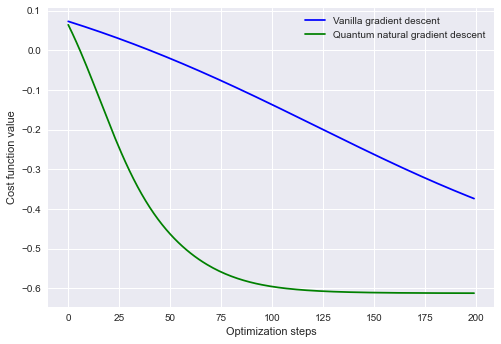

In [17]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")
plt.plot(gd_cost, "b", label="Vanilla gradient descent")
plt.plot(qng_cost, "g", label="Quantum natural gradient descent")

plt.ylabel("Cost function value")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()

References
==========

1.  Shun-Ichi Amari. "Natural gradient works efficiently in learning."
    [Neural computation 10.2,
    251-276](https://www.mitpressjournals.org/doi/abs/10.1162/089976698300017746), 1998.
2.  James Stokes, Josh Izaac, Nathan Killoran, Giuseppe Carleo. "Quantum
    Natural Gradient."
    [arXiv:1909.02108](https://arxiv.org/abs/1909.02108), 2019.
3.  Aram Harrow and John Napp. "Low-depth gradient measurements can
    improve convergence in variational hybrid quantum-classical
    algorithms."
    [arXiv:1901.05374](https://arxiv.org/abs/1901.05374), 2019.
4.  Naoki Yamamoto. "On the natural gradient for variational quantum
    eigensolver."
    [arXiv:1909.05074](https://arxiv.org/abs/1909.05074), 2019.

